In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize and authenticate
api = KaggleApi()
api.authenticate()

# Download the dataset to current directory
dataset_name = "dylanjcastillo/7k-books-with-metadata"
api.dataset_download_files(dataset_name, path=".", unzip=True)

print("Download complete.")

Dataset URL: https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata
Download complete.


In [3]:
import pandas as pd

In [4]:
books = pd.read_csv("books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

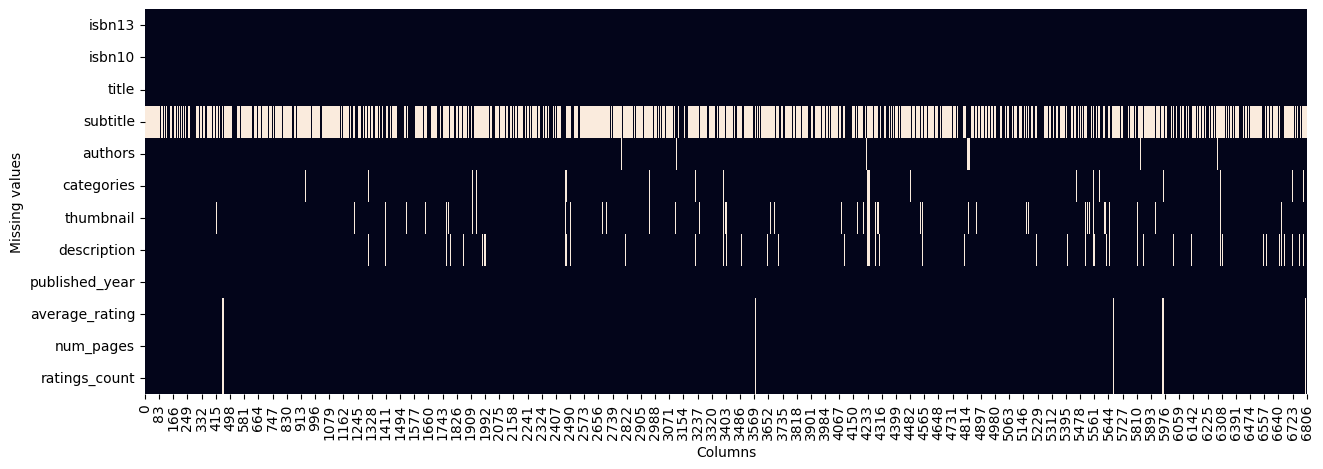

In [8]:
plt.figure(figsize=(15, 5))
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.show()

In [11]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)

books["published_year"] = pd.to_datetime(
    books["published_year"], format="%Y", errors="coerce"
)
books["age_of_book"] = pd.Timestamp.now() - books["published_year"]

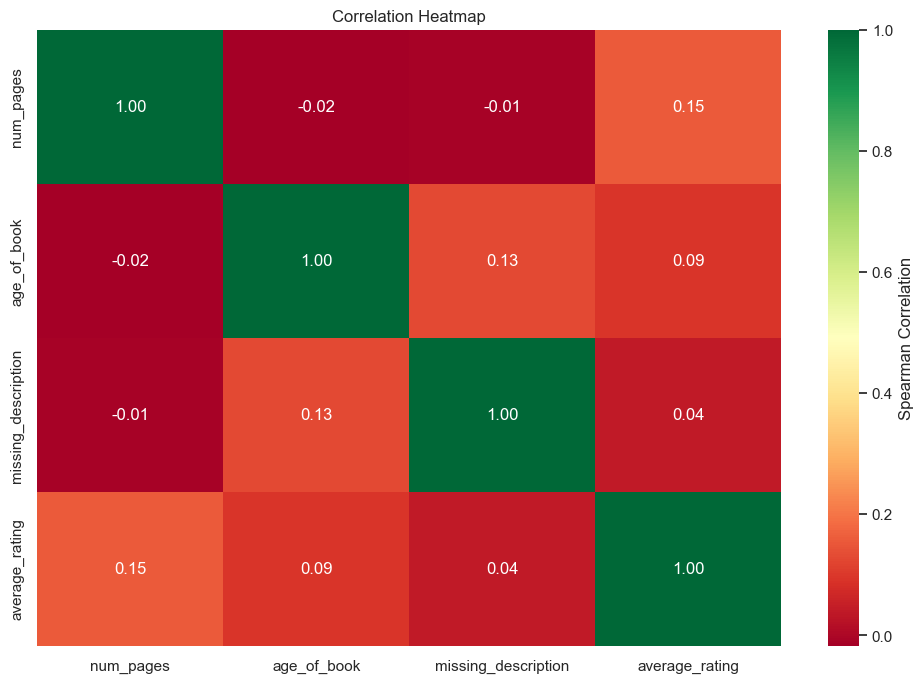

In [12]:
columns_of_interest = [
    "num_pages",
    "age_of_book",
    "missing_description",
    "average_rating",
]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    cbar_kws={"label": "Spearman Correlation"},
)
heatmap.set_title("Correlation Heatmap")
plt.show()

In [15]:
books[
    (books["description"].isna())
    | (books["num_pages"].isna())
    | (books["published_year"].isna())
    | (books["average_rating"].isna())
]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000-01-01,4.10,159.0,446.0,1,9266 days 03:04:19.331974
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002-01-01,4.14,186.0,56781.0,1,8535 days 03:04:19.331974
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978-01-01,4.26,1425.0,1446.0,1,17301 days 03:04:19.331974
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953-01-01,3.64,95.0,430.0,1,26432 days 03:04:19.331974
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976-01-01,4.12,463.0,6.0,1,18032 days 03:04:19.331974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002-01-01,3.80,256.0,155.0,1,8535 days 03:04:19.331974
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006-01-01,0.00,254.0,0.0,1,7074 days 03:04:19.331974
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007-01-01,NaN,NaN,NaN,0,6709 days 03:04:19.331974
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993-01-01,4.08,74.0,324.0,1,11822 days 03:04:19.331974


In [17]:
book_missing = books[
    (~books["description"].isna())
    & (~books["num_pages"].isna())
    & (~books["published_year"].isna())
    & (~books["average_rating"].isna())
]

book_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   isbn13               6507 non-null   int64          
 1   isbn10               6507 non-null   object         
 2   title                6507 non-null   object         
 3   subtitle             2281 non-null   object         
 4   authors              6444 non-null   object         
 5   categories           6474 non-null   object         
 6   thumbnail            6293 non-null   object         
 7   description          6507 non-null   object         
 8   published_year       6507 non-null   datetime64[ns] 
 9   average_rating       6507 non-null   float64        
 10  num_pages            6507 non-null   float64        
 11  ratings_count        6507 non-null   float64        
 12  missing_description  6507 non-null   int64          
 13  age_of_book          65

In [18]:
book_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004-01-01,3.85,247.0,361.0,0,7805 days 03:04:19.331974
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000-01-01,3.83,241.0,5164.0,0,9266 days 03:04:19.331974
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982-01-01,3.97,479.0,172.0,0,15840 days 03:04:19.331974
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993-01-01,3.93,512.0,29532.0,0,11822 days 03:04:19.331974
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002-01-01,4.15,170.0,33684.0,0,8535 days 03:04:19.331974


In [20]:
book_missing["categories"].value_counts().reset_index().sort_values(
    "count", ascending=False
)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [23]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
book_missing["words_in_description"].describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4884\3196373815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: words_in_description, dtype: float64

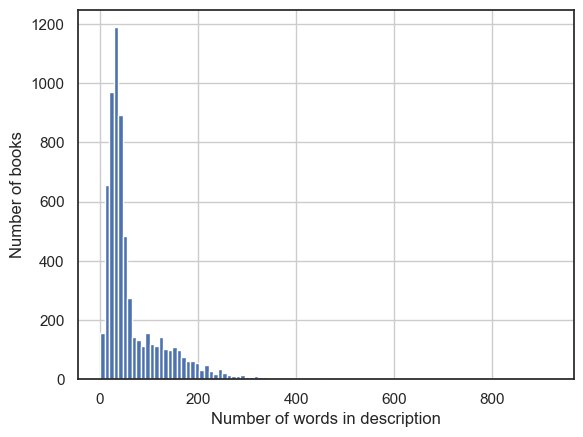

In [25]:
book_missing["words_in_description"].hist(bins=100)
plt.xlabel("Number of words in description")
plt.ylabel("Number of books")
plt.show()

In [29]:
book_missing.loc[book_missing["words_in_description"].between(1, 24), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
6                                               Donation.
10      One of Sidney Sheldon's most popular and bests...
11                                         Fantasy-roman.
32      Tells the story of three generations of Chines...
                              ...                        
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1310, dtype: object

In [38]:
book_missing_25_words = book_missing[book_missing["words_in_description"] > 24]
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004-01-01,3.85,247.0,361.0,0,7805 days 03:04:19.331974,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000-01-01,3.83,241.0,5164.0,0,9266 days 03:04:19.331974,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993-01-01,3.93,512.0,29532.0,0,11822 days 03:04:19.331974,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002-01-01,4.15,170.0,33684.0,0,8535 days 03:04:19.331974,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002-01-01,4.09,176.0,37569.0,0,8535 days 03:04:19.331974,75


In [39]:
book_missing_25_words["title_and_subtitle"] = np.where(
    book_missing_25_words["subtitle"].isna(),
    book_missing_25_words["title"],
    book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1),
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4884\294433959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = np.where(


In [40]:
book_missing_25_words["tagged_description"] = (
    book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4884\4019048848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = (


In [41]:
(
    book_missing_25_words.drop(
        ["subtitle", "missing_description", "age_of_book", "words_in_description"],
        axis=1,
    ).to_csv("books_cleaned.csv", index=False)
)